<a href="https://colab.research.google.com/github/ivanovsdesign/custom_gan/blob/main/custom_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies

In [ ]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

Visualizing data and constructing dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
bearings = pd.read_csv('Series_1.csv.zip')

In [ ]:
bearings

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
0,5.418,6.356,5.585,6.984,5.330,6.468,5.735,7.284,1100.333,1101.891
1,5.340,6.438,5.694,7.119,5.349,6.388,5.719,7.095,1100.333,1101.891
2,5.513,6.554,5.863,7.109,5.458,6.525,5.793,7.178,1100.333,1101.891
3,5.550,6.414,5.788,7.051,5.564,6.469,5.864,7.064,1100.333,1101.891
4,5.383,6.390,5.740,7.052,5.502,6.333,5.765,7.006,1100.333,1101.891
...,...,...,...,...,...,...,...,...,...,...
600995,5.378,6.359,5.724,7.039,5.475,6.340,5.777,7.064,1131.992,1115.636
600996,5.328,6.402,5.717,7.086,5.451,6.347,5.769,7.083,1131.992,1115.636
600997,5.335,6.386,5.705,7.051,5.425,6.357,5.758,7.095,1131.992,1115.636
600998,5.309,6.385,5.685,7.096,5.399,6.367,5.745,7.099,1131.992,1115.636


In [ ]:
from scipy import signal

frequencies, times, Sxx = signal.spectrogram(bearings['Fluctuations_X_in_the_left_bearing'], len(bearings))

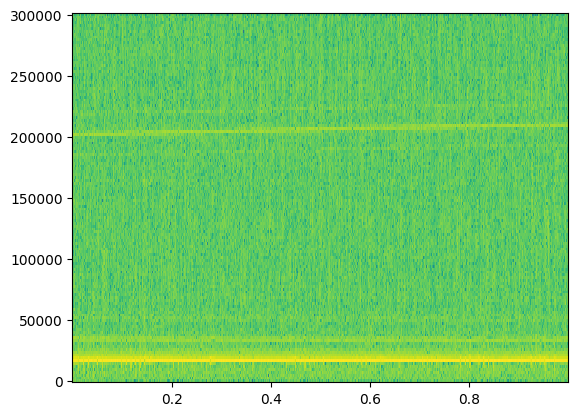

In [ ]:
import matplotlib.pyplot as plt

plt.pcolormesh(times, frequencies, 10*np.log10(Sxx), shading='auto')

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Downloading fashion dataset
df = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8PNIPA/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete8PNIPA/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
df.as_numpy_iterator().next()['label']

2

Visualizing

In [ ]:
import numpy as np

data_iterator = df.as_numpy_iterator()

In [ ]:
# Getting data from a pipeline
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

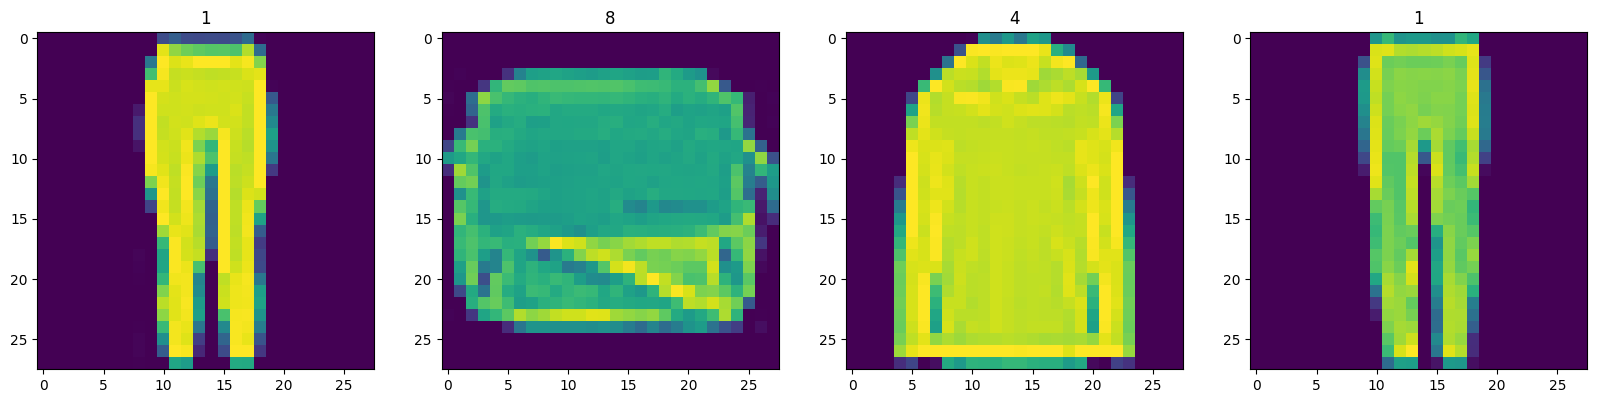

In [ ]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,30))

for _ in range(4):
  batch = data_iterator.next()
  ax[_].imshow(np.squeeze(batch['image']))
  ax[_].title.set_text(batch['label'])

In [ ]:
def scale_images(data):
  image = data['image']
  return image / 255

In [ ]:
# Reload the dataset

ds = tfds.load('fashion_mnist', split='train')

# Running the dataset throug the scale_images preprocessing step

# map
ds = ds.map(scale_images)

# cache
ds = ds.cache()

# shuffle
ds = ds.shuffle(60000)

# batch
ds = ds.batch(128)

# prefetch
ds = ds.prefetch(64)

## Build Neural Network

Import Modelling Components

In [ ]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the Layers for neural networks
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

Build Generator

In [ ]:
def build_generator():
  model = Sequential()

  # Takes in random values and reshaping them to 7x7x128
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))

  # Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(1,5,padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 1
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Convolutional block 2
  model.add(Conv2D(128,4, padding='same'))
  model.add(LeakyReLU(0.2))

  # Conv layer to set to one channel
  model.add(Conv2D(1,4,padding='same', activation='sigmoid'))

  return model

In [ ]:
test_model = build_generator()

In [ ]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
generator = build_generator()

In [ ]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                      

In [26]:
img = generator(np.random.randn(4,128,1))

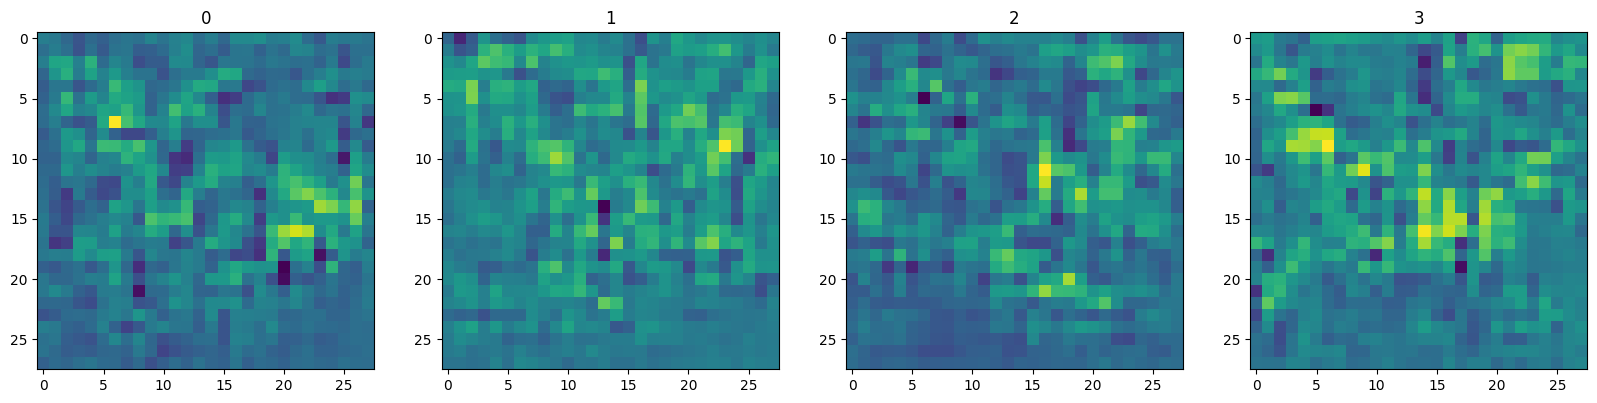

In [27]:
# Generating the images
img = generator(np.random.randn(4,128,1))
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,30))

for idx, img in enumerate(img):
  batch = data_iterator.next()
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

Build Discriminator

In [28]:
def build_discriminator():
  model = Sequential()

  # First convolutional block
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

 # Second convolutional block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

 # Third convolutional block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

 # Fourth convolutional block
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

 # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))



  return model

In [29]:
discriminator = build_discriminator()

In [30]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

In [31]:
img.shape

TensorShape([28, 28, 1])

In [32]:
discriminator.predict(np.expand_dims(img, 0))

1/1 [==============================] - 0s 300ms/step


array([[0.50839967]], dtype=float32)

In [33]:
discriminator.predict(img)

InvalidArgumentError: ignored

## Custom training loop

Setup Losses and Optimizers

In [ ]:
# Optimizer for both
from tensorflow.keras.optimizers import Adam
# Loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Build subclasses model

In [ ]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [ ]:
class FashionGAN(Model):
  def __init__(self, generator, discriminator, *args, **kwargs):
    # Pass through args and kwargs to base class
    super().__init__(*args, **kwargs)

    # Create attributes for generator and discriminator
    self.generator = generator
    self.discriminator = discriminator

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    # Compile with base class
    super().compile(*args, **kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss



  def train_step(self, batch):
    # Get the data
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)), training=False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:
    # Pass the real and fake images to the discriminator model
      yhat_real = self.dicriminator(real_images, training=True)
      yhat_fake = self.discriminator(fake_images, training=True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
    # Create labels for real and fakes images
    # Add some noise to the outputs
    # Calculate loss
    # Apply backpropagation - nn learn
    pass

In [ ]:
# Another way: using decorator

@tf.function
def train_step():
  pass

Build Callback

Train

Review performance